In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Set global plot style
sns.set_style('whitegrid')

# Load the data
# Replace 'data.csv' with the actual path to your data file
data = pd.read_csv('data.csv')

In [4]:
# Preview the first few rows of the data
data.head()

,customer_id,age,gender,tenure,monthly_charges,contract_type,payment_method,churn
0,CUST0001,56,Male,17,149.86,One year,Credit card,No
1,CUST0002,69,Male,50,45.43,One year,Bank transfer,No
2,CUST0003,46,Male,40,58.16,Month-to-month,Cash,No
3,CUST0004,32,Female,45,167.37,Month-to-month,Cash,No
4,CUST0005,60,Male,32,78.06,Two year,Credit card,No


In [5]:
# Basic data information
print("Data Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (1000, 8)

Data Types:
 customer_id         object
age                  int64
gender              object
tenure               int64
monthly_charges    float64
contract_type       object
payment_method      object
churn               object
dtype: object

Missing Values:
 customer_id        0
age                0
gender             0
tenure             0
monthly_charges    0
contract_type      0
payment_method     0
churn              0
dtype: int64


In [6]:
# Data Cleaning
# Dropping duplicates if any
data.drop_duplicates(inplace=True)

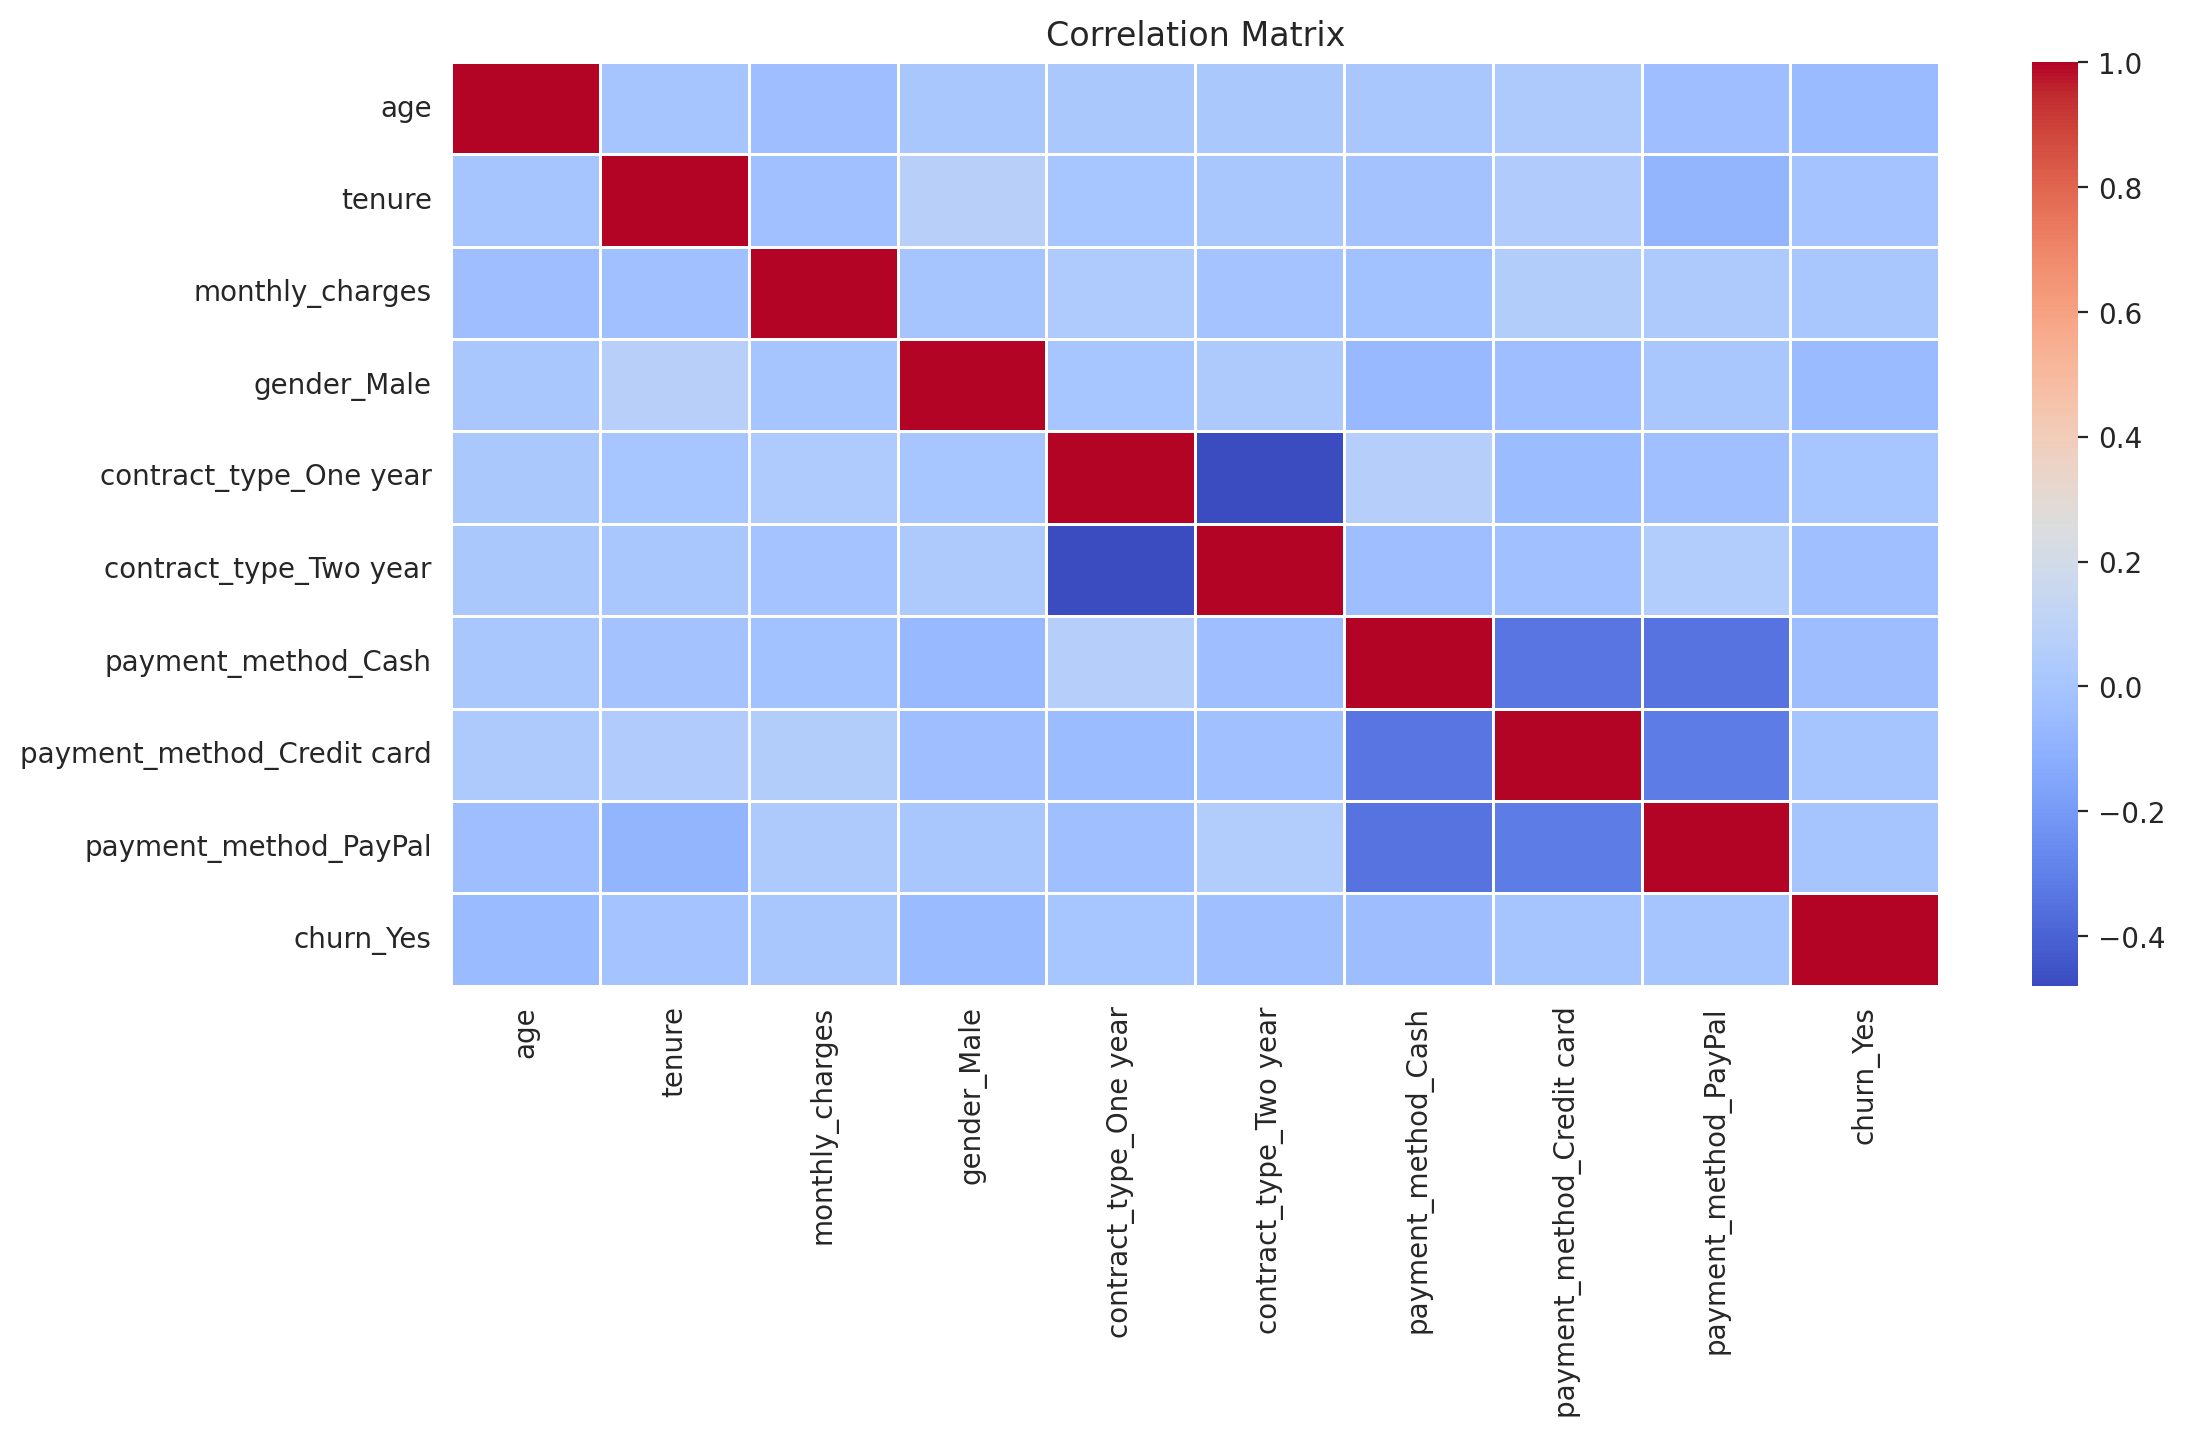

In [8]:
# Handling missing values (numeric and categorical separately)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Convert categorical columns to numeric for correlation calculation
encoded_data = pd.get_dummies(data.drop(columns=["customer_id"]), drop_first=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(encoded_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Define the target column (churn) and feature set
target_column = 'churn'
X = data.drop([target_column, 'customer_id'], axis=1)  # Dropping customer_id as it's just an identifier
y = data[target_column]

# Encode the target column (Yes/No) to binary (0/1)
y = y.map({'No': 0, 'Yes': 1})

# Encoding categorical variables for the feature set
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")


Training samples: 800
Testing samples: 200
Number of features: 6


Accuracy: 0.77
Precision: 0.68
Recall: 0.77
F1 Score: 0.70
ROC-AUC Score: 0.59


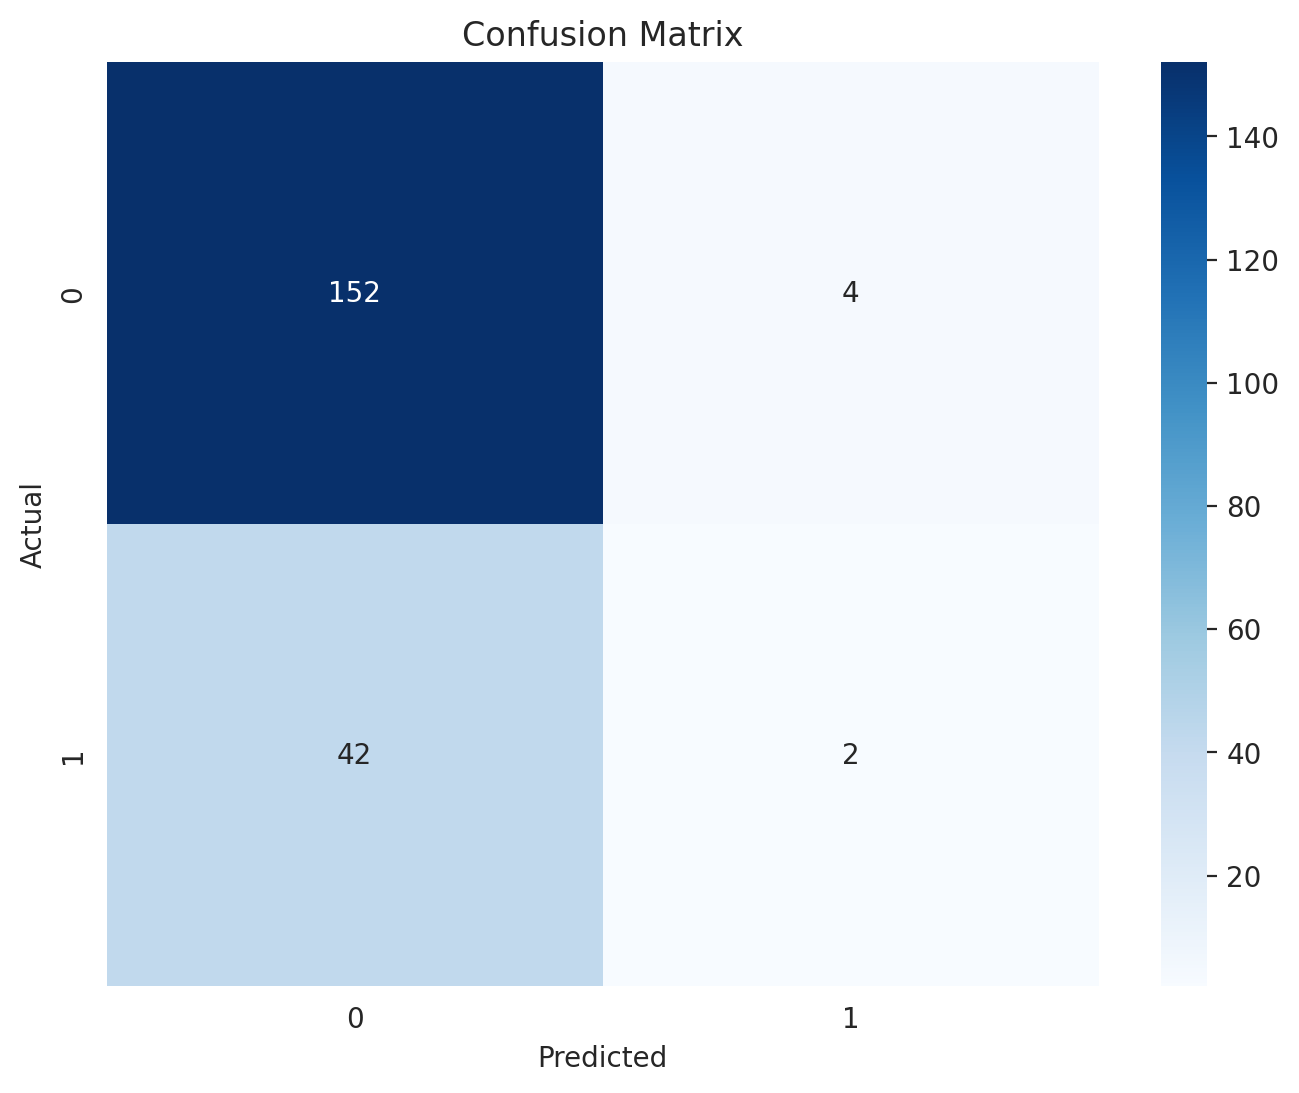

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Use [:, 1] for binary classification

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Save the final model (optional)
import joblib
joblib.dump(grid_search.best_estimator_, 'final_model.pkl')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.4s


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.7925103019721589


['final_model.pkl']